<a href="https://colab.research.google.com/github/Hawar-Dzaee/The-story-of-Hidden-layers/blob/main/ReLU_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How neural networks can capture any shape

While it is easy to understand how to fit a line into a given dataset and comprehend how a model derives a line equation (y=wx+b).

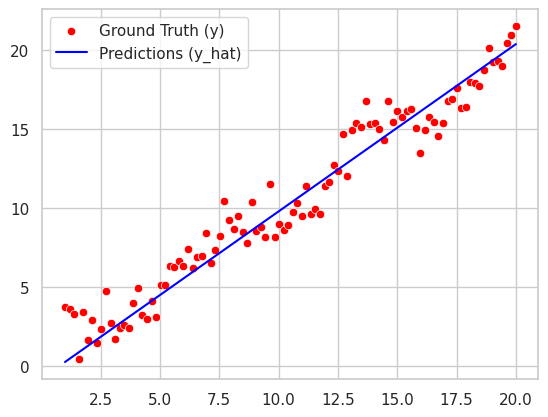

the same cannot be said for the following dataset. In this notebook, we will visually explore how a neural network generates this shape ( the blue line) and the role played by the activation function (ReLU).

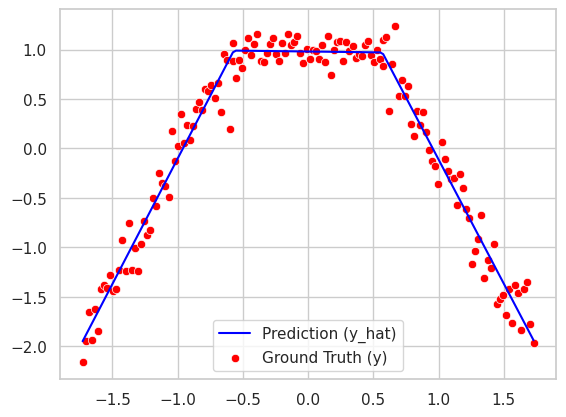

# What will we do ?
we will create a neural network using pytorch on a dummy data set to create the above shape.


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn
import torch.optim as optim

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/My_Lab/ReLU/data.csv')

In [24]:
data.head()

,X,y
0,-1.728137,-2.217843
1,-1.704625,-2.258299
2,-1.681112,-1.486221
3,-1.657600,-2.037315
4,-1.634088,-1.477717


Text(0, 0.5, 'y')

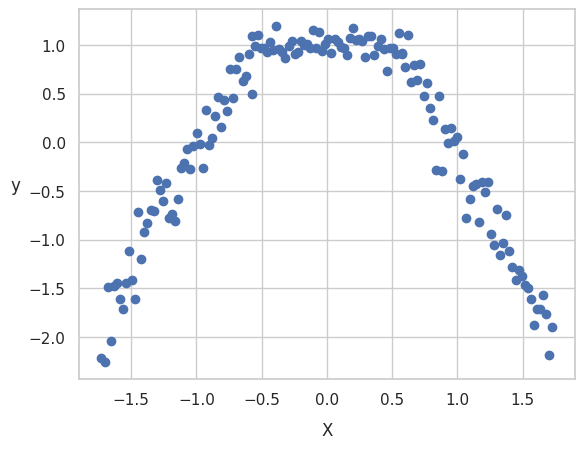

In [25]:
# visualizing our dataset
X = data['X']
y = data['y']
plt.scatter(X,y)
plt.xlabel('X',labelpad=10)
plt.ylabel('y',rotation=0,labelpad = 10)

# Pytorch
Training the model

In [26]:
# Preparing the data to ensure it is in an acceptable dimension(s) and format for the PyTorch training model.
X = torch.tensor(X, dtype=torch.float32).unsqueeze(1).clone().detach()
y = torch.tensor(y, dtype=torch.float32).unsqueeze(1).clone().detach()
print(X.shape,type(X))
print(y.shape,type(y))

torch.Size([150, 1]) <class 'torch.Tensor'>
torch.Size([150, 1]) <class 'torch.Tensor'>


In [27]:
torch.manual_seed(2)
#---------------------#
model = nn.Sequential(
    nn.Linear(1,2),
    nn.ReLU(),
    nn.Linear(2,1)
)
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.1)


for epoch in range(1,260):
    model.train()

    pred = model(X)
    loss = loss_fn(pred, y)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    if epoch%10 == 0 :
      print(f'Epoch {epoch:>5}    Loss: {loss.item()}')

Epoch    10    Loss: 0.9994385838508606
Epoch    20    Loss: 0.9855772852897644
Epoch    30    Loss: 0.6870971918106079
Epoch    40    Loss: 0.22086265683174133
Epoch    50    Loss: 0.14585788547992706
Epoch    60    Loss: 0.04076506569981575
Epoch    70    Loss: 0.04243706166744232
Epoch    80    Loss: 0.03642987087368965
Epoch    90    Loss: 0.033079031854867935
Epoch   100    Loss: 0.032368000596761703
Epoch   110    Loss: 0.03242465853691101
Epoch   120    Loss: 0.03229402005672455
Epoch   130    Loss: 0.03223637118935585
Epoch   140    Loss: 0.032221533358097076
Epoch   150    Loss: 0.032221194356679916
Epoch   160    Loss: 0.032220520079135895
Epoch   170    Loss: 0.032219961285591125
Epoch   180    Loss: 0.032219674438238144
Epoch   190    Loss: 0.032219551503658295
Epoch   200    Loss: 0.0322195366024971
Epoch   210    Loss: 0.03221952170133591
Epoch   220    Loss: 0.03221951797604561
Epoch   230    Loss: 0.032219525426626205
Epoch   240    Loss: 0.03221952170133591
Epoch   250

# Evaluating the model

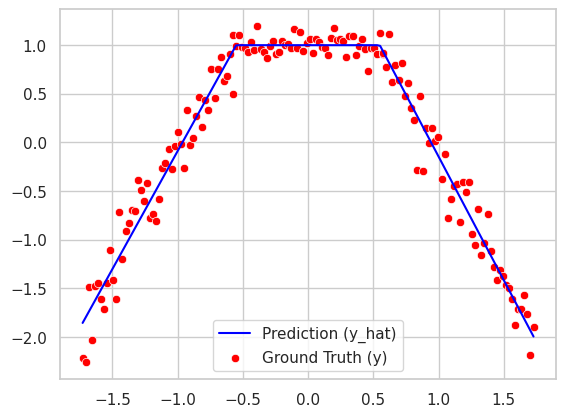

In [28]:
model.eval()
with torch.no_grad() :
  sns.set(style='whitegrid')
  sns.lineplot(x=X.reshape(-1),y=pred.reshape(-1),color='blue',label='Prediction (y_hat)')
  sns.scatterplot(x=X.reshape(-1),y=y.reshape(-1),color='red',label = 'Ground Truth (y)')

# How did the model arrive at that shape? What was the role of the hidden layers?"

Well, to start, the trained model yielded the following weights and biases.

In [29]:

wb = {}

for i in range (0,len(model),2):  # len(model) number of layers
  number_of_output_neuron = model[i].weight.shape[0]   # 3
  number_of_input_neuron = model[i].weight.shape[1]    # 1

  for out in range(number_of_output_neuron): #3
    wb[f'b{i}_{out+1}'] = model[i].bias[out].item()
    for in_ in range(number_of_input_neuron):#1
      wb[f'w{i}_{in_+1}_{out+1}'] = model[i].weight[out][in_].item()

wb

{'b0_1': -1.1638339757919312,
 'w0_1_1': -2.1117208003997803,
 'b0_2': -0.8806632161140442,
 'w0_1_2': 1.6018363237380981,
 'b2_1': 0.9964778423309326,
 'w2_1_1': -1.148013710975647,
 'w2_2_1': -1.585605263710022}

In [30]:
def myRelu(input):
  return np.maximum(0.0,input)

In [31]:
h1 = wb['w0_1_1']*X + wb['b0_1']
h2 = wb['w0_1_2']*X + wb['b0_2']

v1 = myRelu(h1)
v2 = myRelu(h2)

y_hat = (v1* wb['w2_1_1']) + (v2*wb['w2_2_1'])  + wb['b2_1']

# The story of hidden layer

The data points undergo the following transformation:\
yellow represents the first neuron of the hidden layer,\
while purple represents the second neuron of the hidden layer.

If your goal is solely conceptual understanding, feel free to skip the code and proceed directly to the visualization.

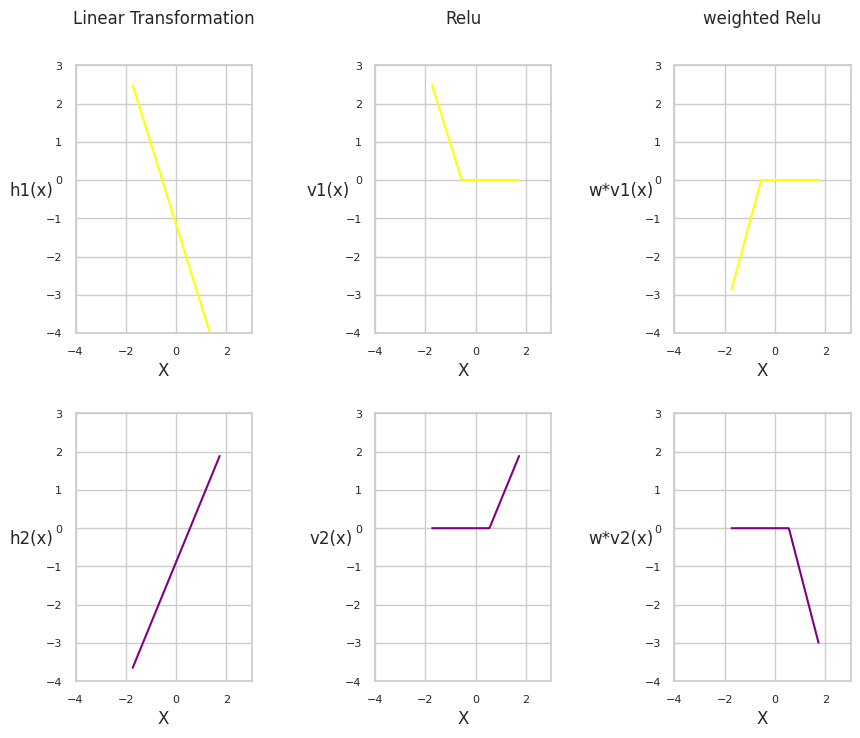

In [32]:
fig, axes = plt.subplots(2, 3, figsize=(10, 8))

# node 1
# Linear Transformation.
sns.set(style='whitegrid')
sns.lineplot(x = X.reshape(-1), y = h1.reshape(-1), color='yellow', ax=axes[0,0])
axes[0,0].set_xlim(-4, 3)
axes[0,0].set_ylim(-4, 3)
axes[0,0].set_xlabel('X')
axes[0,0].set_ylabel('h1(x)',rotation=0,labelpad=10)
axes[0,0].tick_params(axis='both',which='both',labelsize=8)
axes[0,0].set_title('Linear Transformation',pad=30)

# Relu. v1 = myRelu(hidden_1)
sns.set(style='whitegrid')
sns.lineplot(x = X.reshape(-1), y = v1.reshape(-1), color='yellow', ax=axes[0,1])
axes[0,1].set_xlim(-4, 3)
axes[0,1].set_ylim(-4, 3)
axes[0,1].set_xlabel('X')
axes[0,1].set_ylabel('v1(x)',rotation=0,labelpad=12)
axes[0,1].tick_params(axis='both',which='both',labelsize=8)
axes[0,1].set_title('Relu',pad=30)

# weighted Relu
sns.set(style='whitegrid')
sns.lineplot(x = X.reshape(-1), y =(v1*wb['w2_1_1']).reshape(-1), color='yellow', ax=axes[0,2])
axes[0,2].set_xlim(-4, 3)
axes[0,2].set_ylim(-4, 3)
axes[0,2].set_xlabel('X')
axes[0,2].set_ylabel('w*v1(x)',rotation=0,labelpad=17)
axes[0,2].tick_params(axis='both',which='both',labelsize=8)
axes[0,2].set_title('weighted Relu',pad=30)


# node 2
sns.set(style='whitegrid')
sns.lineplot(x = X.reshape(-1), y = h2.reshape(-1), color='purple', ax=axes[1,0])
axes[1,0].set_xlim(-4, 3)
axes[1,0].set_ylim(-4, 3)
axes[1,0].set_xlabel('X')
axes[1,0].set_ylabel('h2(x)',rotation=0,labelpad=10)
axes[1,0].tick_params(axis='both',which='both',labelsize=8)

# Relu. v1 = myRelu(hidden_1)
sns.set(style='whitegrid')
sns.lineplot(x = X.reshape(-1), y = v2.reshape(-1), color='purple', ax=axes[1,1])
axes[1,1].set_xlim(-4, 3)
axes[1,1].set_ylim(-4, 3)
axes[1,1].set_xlabel('X')
axes[1,1].set_ylabel('v2(x)',rotation=0,labelpad=10)
axes[1,1].tick_params(axis='both',which='both',labelsize=8)

# weighted Relu
sns.set(style='whitegrid')
sns.lineplot(x = X.reshape(-1), y =(v2*wb['w2_2_1']).reshape(-1), color='purple', ax=axes[1,2])
axes[1,2].set_xlim(-4, 3)
axes[1,2].set_ylim(-4, 3)
axes[1,2].set_xlabel('X')
axes[1,2].set_ylabel('w*v2(x)',rotation=0,labelpad=17)
axes[1,2].tick_params(axis='both',which='both',labelsize=8)



plt.subplots_adjust(wspace=0.7, hspace=0.3)

# Blue (y_hat) = Purple  + yellow  + bias

<Axes: >

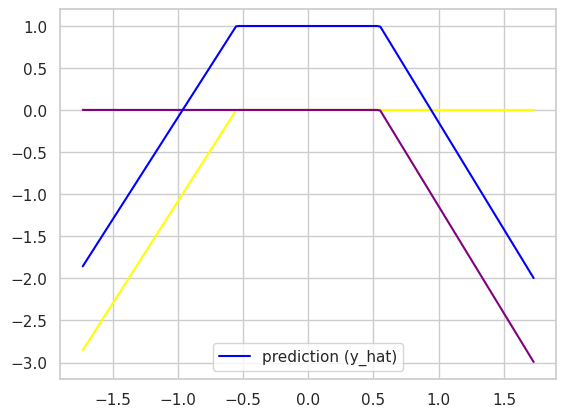

In [35]:
sns.set(style = 'whitegrid')
sns.lineplot(x = X.reshape(-1),
            y = (v1*wb['w2_1_1']).reshape(-1),
            color = 'yellow')

sns.set(style = 'whitegrid')
sns.lineplot(x = X.reshape(-1),
            y = (v2*wb['w2_2_1']).reshape(-1),
            color = 'purple')


sns.lineplot(x=X.reshape(-1),
             y=y_hat.reshape(-1),
             color='blue',
             label= 'prediction (y_hat)')

# we can see adding the bias will give us the blue shape, which is our final prediction

<Axes: >

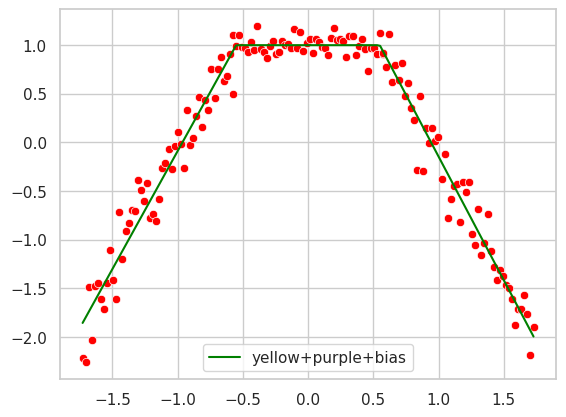

In [43]:
sns.scatterplot(x=X.reshape(-1),
                y=y.reshape(-1),
                color = 'red')

sns.lineplot(x=X.reshape(-1),
             y=((v1* wb['w2_1_1']) + (v2*wb['w2_2_1'])  + wb['b2_1']).reshape(-1),
             color='green',
             label= 'yellow+purple+bias')